In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import os,sys
from scipy import stats
import seaborn as sns
import numpy as np 
from scipy.optimize import curve_fit 


In [3]:
#tele['size'].isin(['Ve', 'Pr'])

NameError: name 'tele' is not defined

In [7]:
#load in tv data as tele
tele = pd.read_csv('C:/Users/mneft/tele.csv')
tele.head


<bound method NDFrame.head of      avgrating         brand      price size
0          4.8            LG     749.99   75
1          4.8            LG   2,199.99   65
2          4.6            LG     479.99   65
3          4.7       Samsung     349.99   50
4          4.5       Toshiba     239.99   43
5          4.6       Toshiba     219.99   43
6          4.8          Sony  59,999.99   98
7          4.8          Sony   2,999.99   85
8          4.8       Samsung     999.99   43
9          4.2       Hisense     999.99   65
10         4.6     Insignia™     279.99   55
11         4.0    SunBriteTV   4,295.98   Pr
12         4.7  Westinghouse     229.99   50
13         4.6         VIZIO     199.99   40
14         4.8          Sony   1,199.99   65
15         4.5         VIZIO     749.99   65
16         4.7          Sony     699.99   55
17         4.6         VIZIO     299.99   50
18         4.7            LG     549.99   65
19         4.7            LG     449.99   55
20         4.2       Hise

# Cleaning

### Loading data

In [8]:
tele.dtypes

avgrating    float64
brand         object
price         object
size          object
dtype: object

#  changing data types and removing comma


In [9]:
#turns size and price from obj to numeric(int32)


#tele['brand'] = tele['brand'].astype(c)
#tele = tele[(tele.size = range(257))]
#tele2 = tele[tele.size != 'Pr']
#pd.to_numeric(tele['price'])
#tele['price'].astype(int)
tele['avgrating'].astype(int)
#tele['size'].astype(int)
tele['price'] = tele['price'].str.replace(',', '')
tele['price'] = tele.price.astype(float)

# Get names of indexes for which column Age has value 30
#tele2 = tele[ tele['size'] == "Pr" ].index
#tele2 = tele.drop(tele[tele.size != "float54"].index)
tele.head()


,avgrating,brand,price,size
0,4.8,LG,749.99,75
1,4.8,LG,2199.99,65
2,4.6,LG,479.99,65
3,4.7,Samsung,349.99,50
4,4.5,Toshiba,239.99,43


In [10]:
#tele['size'].isin(['Ve', 'Pr'])
tele = tele[~tele['size'].isin(['Ve', 'Pr'])]
tele['size'].unique()

array(['75', '65', '50', '43', '98', '85', '55', '40', '32', '24', '70',
       '58', '22', '49', '60', '19', '82', '28', '39', '77', '86', '88'],
      dtype=object)

In [22]:
tele = tele[tele['price']<3000]

# basic stats

In [11]:
# gets stats on size of tv's

#tele= tele['size'].astype(float)
tele.describe()



,avgrating,price
count,248.000000,248.000000
mean,4.583468,1530.610968
std,0.308334,5744.529123
min,2.000000,59.990000
25%,4.600000,249.990000
50%,4.600000,489.990000
75%,4.700000,1099.990000
max,5.000000,59999.990000


NameError: name 'telenewer' is not defined

In [13]:
#telenewer is current df playing with. delete all tv's costing more than 3k



#do'nt think I need this
#telenewer['price'].describe()
tele = tele[tele['price']<3000]

tele['price'].describe()




count     232.000000
mean      709.877931
std       698.653991
min        59.990000
25%       249.990000
50%       449.990000
75%       899.990000
max      2999.990000
Name: price, dtype: float64

In [14]:
#gets rid of VE and Pr in size
tele[~tele['size'].isin(['Ve', 'Pr'])]

,avgrating,brand,price,size
0,4.8,LG,749.99,75
1,4.8,LG,2199.99,65
2,4.6,LG,479.99,65
3,4.7,Samsung,349.99,50
4,4.5,Toshiba,239.99,43
5,4.6,Toshiba,219.99,43
7,4.8,Sony,2999.99,85
8,4.8,Samsung,999.99,43
9,4.2,Hisense,999.99,65
10,4.6,Insignia™,279.99,55


,avgrating,brand,price,size
0,4.6,Samsung,329.99,55
1,4.6,Samsung,179.99,40
2,4.8,LG,"2,099.99",65
3,4.5,Toshiba,299.99,55
4,4.6,Sharp,169.99,40
...,...,...,...,...
253,4.8,LG,729.99,75
254,4.7,Insignia™,279.99,55
255,4.7,Westinghouse,199.99,50
256,4.6,Samsung,549.99,70


Text(0.5, 1.0, 'Count of Tvs')

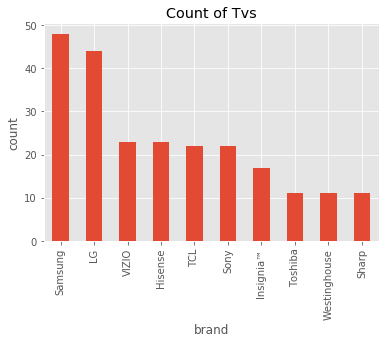

In [15]:
tele['brand'].value_counts().plot(kind='bar')
plt.xlabel('brand')
plt.ylabel('count')
plt.title('Count of Tvs')

DataError: No numeric types to aggregate

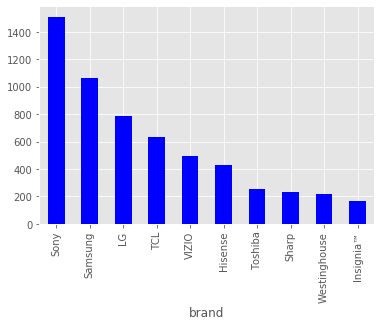

In [16]:
#scatter_df = telenewer[['price', 'brand']]
#telenewer.plot.scatter(y='price', x='avgrating')
tele.groupby('brand')['price'].mean().sort_values(ascending=False).plot.bar(color='b')
tele.groupby('brand')['size'].median().sort_values(ascending=False).plot.bar(color='b')

In [17]:
tele.dtypes

avgrating    float64
brand         object
price        float64
size          object
dtype: object

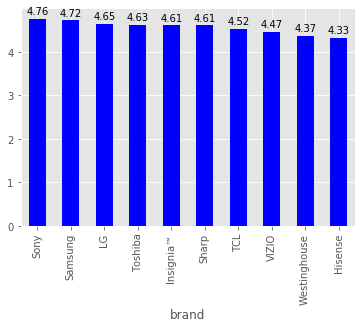

In [19]:
plot = tele.groupby('brand')['avgrating'].mean().sort_values(ascending=False).plot.bar(color='b')
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x()+p.get_width()/2.,
            height+.1,
            '{:1.2f}'.format(height),
            ha="center") 

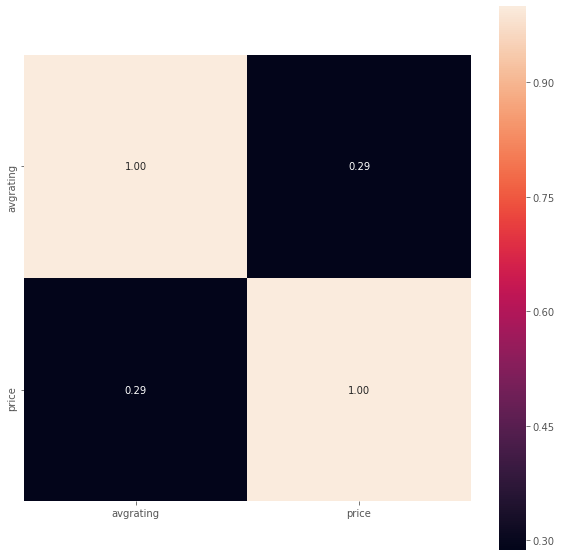

In [20]:
corrmat = tele.corr()
f, ax = plt.subplots(figsize=(10, 10))

hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [24]:
tele.dtypes
tele.dtypes
tele.tail(40)
tele['size']

0      75
1      65
2      65
3      50
4      43
5      43
7      85
8      43
9      65
10     55
12     50
13     40
14     65
15     65
16     55
17     50
18     65
19     55
20     32
21     32
22     55
23     50
24     55
25     24
26     43
27     50
28     32
29     24
30     65
31     43
       ..
227    60
228    70
229    55
230    55
231    32
232    65
233    50
234    49
235    49
236    55
237    32
238    55
239    65
240    40
241    55
242    50
243    50
244    32
245    32
246    55
247    39
248    65
249    65
250    43
251    50
252    32
253    55
254    55
255    65
256    50
Name: size, Length: 232, dtype: object

In [38]:
tele2 = tele.copy()
#holyy = pd.Series(telenewer2['size'])
#holyy
  
#telenewer2 = pd.to_numeric(telenewer2['size'], errors ='coerce') 
bob = tele2['size'].astype(int)
tele2
del tele2['size']
tele2
#bob
#telenewer2.concat(bob, how = "right")
#leftmerge = pd.merge([telenewer2, bob], how='right')
#leftmerge
frames = [tele2, bob]

#pleasebeit = pd.merge(telenewer2, bob, how='left')
#pleasebeit.dtypes
#result = tele2.append(bob)
#result
r = pd.concat([tele2, bob], axis=1)
r

,avgrating,brand,price,size
0,4.8,LG,749.99,75
1,4.8,LG,2199.99,65
2,4.6,LG,479.99,65
3,4.7,Samsung,349.99,50
4,4.5,Toshiba,239.99,43
5,4.6,Toshiba,219.99,43
7,4.8,Sony,2999.99,85
8,4.8,Samsung,999.99,43
9,4.2,Hisense,999.99,65
10,4.6,Insignia™,279.99,55


In [90]:
r = r['size'].astype(np.int64)
r.head()

0    75
1    65
2    65
3    50
4    43
Name: size, dtype: int64

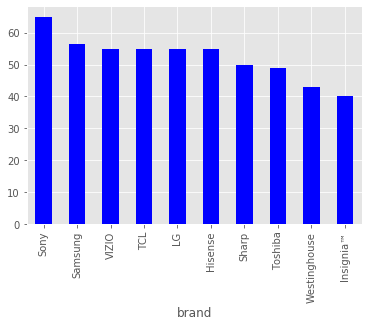

In [42]:
r.groupby('brand')['size'].median().sort_values(ascending=False).plot.bar(color='b')

In [43]:
#print(telebrand.avgrating().sort_values(ascending = False))
rsiz = r.groupby('size')
rsiz.head()


,avgrating,brand,price,size
0,4.8,LG,749.99,75
1,4.8,LG,2199.99,65
2,4.6,LG,479.99,65
3,4.7,Samsung,349.99,50
4,4.5,Toshiba,239.99,43
5,4.6,Toshiba,219.99,43
7,4.8,Sony,2999.99,85
8,4.8,Samsung,999.99,43
9,4.2,Hisense,999.99,65
10,4.6,Insignia™,279.99,55


In [46]:
print(rsiz.size().sort_values(ascending = False))

size
55    44
65    41
43    25
32    23
75    21
50    20
49    13
24     8
40     8
70     6
58     6
82     5
60     3
85     3
39     2
22     1
86     1
28     1
19     1
dtype: int64


# Bar charts and stats

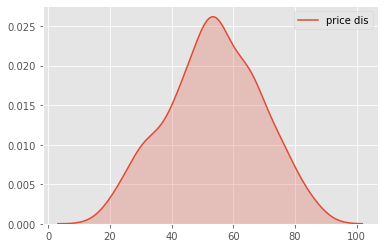

In [50]:
#sns.kdeplot(r['price'], shade=True, label='price dis')
sns.kdeplot(r['size'], shade=True, label='price dis')

In [52]:
#telenew['brand'].describe()
#telenew1 = telenew.set_index('brand').index
#telenew['price']
#tele[tele['brand']=='Samsung']['price'].describe()
r[r['brand']=='Samsung']['price'].describe()
#r[r['brand']=='Sony']['price'].describe()

count      48.000000
mean     1064.365000
std       782.624897
min       179.990000
25%       479.990000
50%       799.990000
75%      1549.990000
max      2999.990000
Name: price, dtype: float64

In [53]:
#print(r.size().sort_values(ascending = False))

TypeError: 'numpy.int32' object is not callable

Text(0.5, 1.0, 'Average Rating')

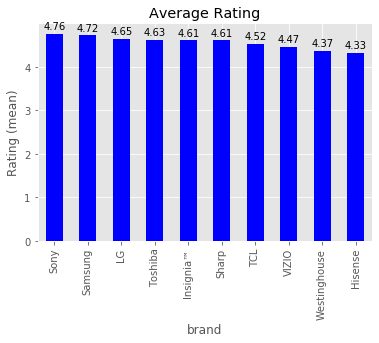

In [55]:
#plot = telenewer.groupby('brand')['avgrating'].mean().sort_values(ascending=False).plot.bar(color='b')
#plot.set_ylabel("Rating (mean)", fontsize=12)
#for p in plot.patches:
#    height = p.get_height()
#    plot.text(p.get_x()+p.get_width()/2.,
#            height+.1,
#            '{:1.2f}'.format(height),
#            ha="center") 
#plt.title('Average Rating')

plot = r.groupby('brand')['avgrating'].mean().sort_values(ascending=False).plot.bar(color='b')
plot.set_ylabel("Rating (mean)", fontsize=12)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x()+p.get_width()/2.,
            height+.1,
            '{:1.2f}'.format(height),
            ha="center") 
plt.title('Average Rating')

Text(0.5, 1.0, 'Average price')

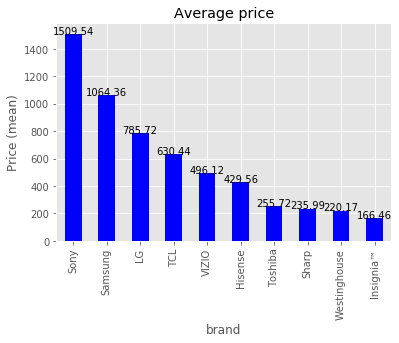

In [56]:
plot = r.groupby('brand')['price'].mean().sort_values(ascending=False).plot.bar(color='b')
plot.set_ylabel("Price (mean)", fontsize=12)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x()+p.get_width()/2.,
            height+.1,
            '{:1.2f}'.format(height),
            ha="center") 
plt.title('Average price')

Text(0.5, 1.0, 'Average Screen size')

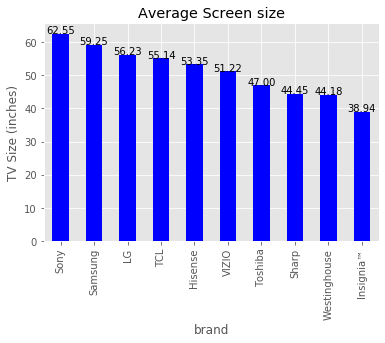

In [57]:
plot = r.groupby('brand')['size'].mean().sort_values(ascending=False).plot.bar(color='b')
plot.set_ylabel("TV Size (inches)", fontsize=12)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x()+p.get_width()/2.,
            height+.1,
            '{:1.2f}'.format(height),
            ha="center") 
plt.title('Average Screen size')

In [58]:
r.groupby('brand')['price'].agg(['mean', 'std', 'count','median'])

,mean,std,count,median
brand,,,,
Hisense,429.555217,265.338176,23,379.99
Insignia™,166.460588,82.986533,17,149.99
LG,785.717273,687.854411,44,574.99
Samsung,1064.365000,782.624897,48,799.99
Sharp,235.990000,92.374239,11,249.99
Sony,1509.535455,786.713945,22,1249.99
TCL,630.444545,679.814241,22,364.99
Toshiba,255.717273,95.219841,11,249.99
VIZIO,496.120435,377.557738,23,379.99


In [59]:
r.groupby('brand')['size'].agg(['mean', 'std', 'count','median','max'])

,mean,std,count,median,max
brand,,,,,
Hisense,53.347826,13.033554,23,55.0,75
Insignia™,38.941176,11.939800,17,40.0,55
LG,56.227273,15.360571,44,55.0,86
Samsung,59.250000,14.018984,48,56.5,85
Sharp,44.454545,11.174647,11,50.0,58
Sony,62.545455,11.261935,22,65.0,85
TCL,55.136364,12.710309,22,55.0,75
Toshiba,47.000000,9.859006,11,49.0,65
VIZIO,51.217391,15.885833,23,55.0,75


In [60]:
r.groupby('brand')['avgrating'].agg(['mean', 'std', 'count','median'])

,mean,std,count,median
brand,,,,
Hisense,4.326087,0.374430,23,4.4
Insignia™,4.611765,0.099262,17,4.6
LG,4.647727,0.148619,44,4.7
Samsung,4.722917,0.099444,48,4.7
Sharp,4.609091,0.070065,11,4.6
Sony,4.759091,0.085407,22,4.8
TCL,4.522727,0.244816,22,4.6
Toshiba,4.627273,0.100905,11,4.6
VIZIO,4.465217,0.305419,23,4.5


(0.2874497723228689, 8.630768596257945e-06)


Text(0.5, 1, 'Average rating and price')

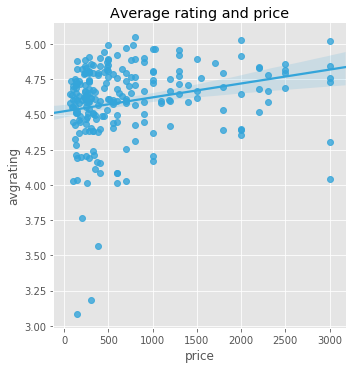

In [65]:
sns.lmplot('price', 'avgrating', data=r, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('price', fontsize=12)
plt.ylabel('avgrating', fontsize=12)
print(stats.pearsonr(r.avgrating, r.price))
plt.title('Average rating and price')

# Get sub cat of tv's

In [66]:
rLG = r[r.brand == 'LG']
rsony = r[r.brand == 'Sony']
rsamsung = r[r.brand == 'Samsung']
rvizio = r[r.brand == 'VIZIO']
rsharp = r[r.brand == 'Sharp']
rtoshiba = r[r.brand == 'toshiba']

#rLG

In [68]:
#heat map without the pretty pic
corrdf = r[['size', 'avgrating', 'price']]
corrdf.corr()

,size,avgrating,price
size,1.000000,0.224636,0.696952
avgrating,0.224636,1.000000,0.287450
price,0.696952,0.287450,1.000000


In [69]:
brandd = r.groupby('brand')
print(brandd)
brandd.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

avgrating                                      price            \
                 count    sum  min  max      mean       std count       sum   
brand                                                                         
Hisense             23   99.5  3.1  4.7  4.326087  0.374430    23   9879.77   
Insignia™           17   78.4  4.3  4.7  4.611765  0.099262    17   2829.83   
LG                  44  204.5  3.9  4.8  4.647727  0.148619    44  34571.56   
Samsung             48  226.7  4.5  4.9  4.722917  0.099444    48  51089.52   
Sharp               11   50.7  4.5  4.7  4.609091  0.070065    11   2595.89   
Sony                22  104.7  4.5  4.9  4.759091  0.085407    22  33209.78   
TCL                 22   99.5  4.0  5.0  4.522727  0.244816    22  13869.78   
Toshiba             11   50.9  4.5  4.8  4.627273  0.100905    11   2812.89   
VIZIO               23  102.7  3.3  4.9  4.465217  0.305419    23  11410.77   
Westinghouse        11   48.1  4.1  5.0  4.372727  0.276011    11   2421.89   

                                                        size                \
                 min      max         mean         std count   sum min max   
brand                                                                        
Hisense       129.99   999.99   429.555217  265.338176    23  1227  32  75   
Insignia™      59.99   329.99   166.460588   82.986533    17   662  19  55   
LG             89.99  2999.99   785.717273  687.854411    44  2474  24  86   
Samsung       179.99  2999.99  1064.365000  782.624897    48  2844  32  85   
Sharp          99.99   379.99   235.990000   92.374239    11   489  24  58   
Sony          599.99  2999.99  1509.535455  786.713945    22  1376  43  85   
TCL           129.99  2999.99   630.444545  679.814241    22  1213  32  75   
Toshiba        99.99   449.99   255.717273   95.219841    11   517  32  65   
VIZIO         119.99  1549.99   496.120435  377.557738    23  1178  24  75   
Westinghouse   99.99   599.99   220.171818  142.029446    11   486  24  65   

                                    
                   mean        std  
brand                               
Hisense       53.347826  13.033554  
Insignia™     38.941176  11.939800  
LG            56.227273  15.360571  
Samsung       59.250000  14.018984  
Sharp         44.454545  11.174647  
Sony          62.545455  11.261935  
TCL           55.136364  12.710309  
Toshiba       47.000000   9.859006  
VIZIO         51.217391  15.885833  
Westinghouse  44.181818  13.143958

# Graphing Tv's by brand

(nan, 1.0)


Text(0.5, 1, 'Average Rating and Size')

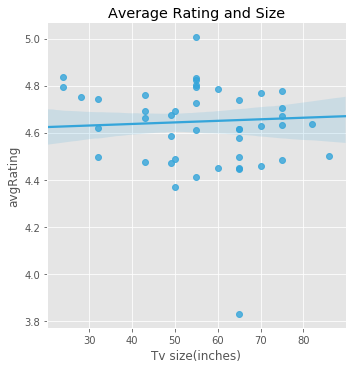

In [70]:
sns.lmplot('size', 'avgrating', data=rLG, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('Tv size(inches)', fontsize=12)
plt.ylabel('avgRating', fontsize=12)

print(stats.pearsonr(rLG.avgrating, rLG.size))
plt.title('Average Rating and Size')

(nan, 1.0)


Text(0.5, 1, 'Average Rating and Size Samsung')

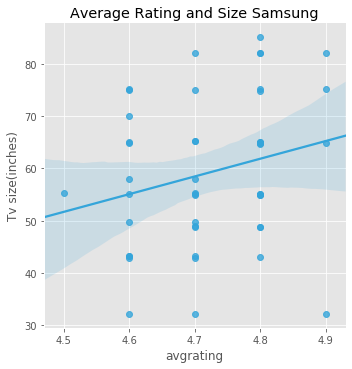

In [87]:
sns.lmplot('avgrating', 'size', data=rsamsung, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('avgrating', fontsize=12)
plt.ylabel('Tv size(inches)', fontsize=12)
print(stats.pearsonr(rsony.avgrating, rsony.size))
plt.title('Average Rating and Size Samsung')

(nan, 1.0)


Text(0.5, 1, 'Average Rating and Size')

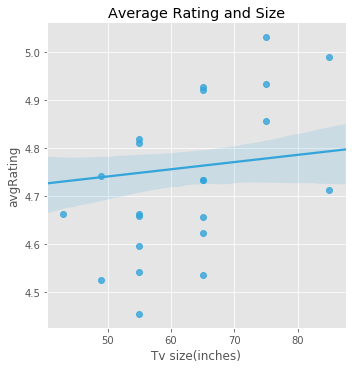

In [71]:
sns.lmplot('size', 'avgrating', data=rsony, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('Tv size(inches)', fontsize=12)
plt.ylabel('avgRating', fontsize=12)
print(stats.pearsonr(rsony.avgrating, rsony.size))
plt.title('Average Rating and Size')


(nan, 1.0)


Text(0.5, 1, 'Average Rating and Size')

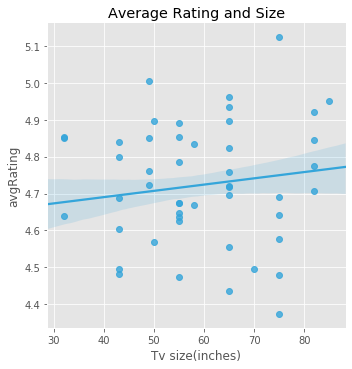

In [72]:
sns.lmplot('size', 'avgrating', data=rsamsung, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('Tv size(inches)', fontsize=12)
plt.ylabel('avgRating', fontsize=12)
print(stats.pearsonr(rsamsung.avgrating, rsamsung.size))
plt.title('Average Rating and Size')

Text(0.5, 1, 'Average Rating and Size')

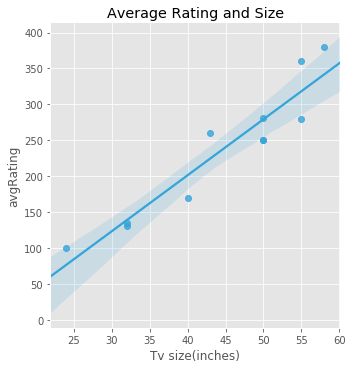

In [73]:
sns.lmplot('size', 'price', data=rsharp, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('Tv size(inches)', fontsize=12)
plt.ylabel('avgRating', fontsize=12)
#print(stats.pearsonr(rsharp.price, rsharp.size))
plt.title('Average Rating and Size')

Text(0.5, 1, 'Average Rating and Size samsung')

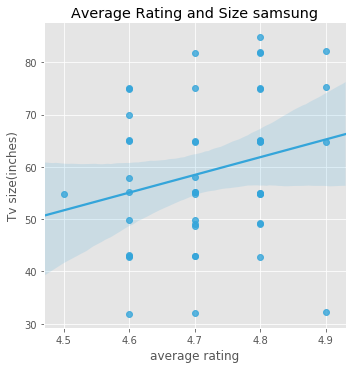

In [74]:
sns.lmplot('avgrating', 'size', data=rsamsung, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('average rating', fontsize=12)
plt.ylabel('Tv size(inches)', fontsize=12)
#print(stats.pearsonr(rsamsung.avgrating, rsamsung.size))
plt.title('Average Rating and Size samsung')


Text(0.5, 1, 'Average Rating and Size LG')

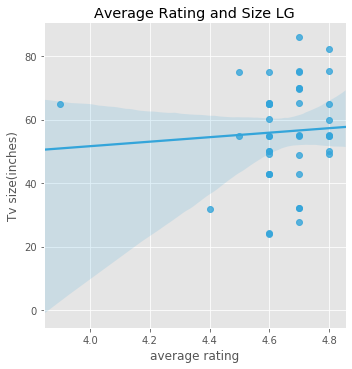

In [75]:
sns.lmplot('avgrating', 'size', data=rLG, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('average rating', fontsize=12)
plt.ylabel('Tv size(inches)', fontsize=12)
#print(stats.pearsonr(rsamsung.avgrating, rsamsung.size))
plt.title('Average Rating and Size LG')


Text(0.5, 1, 'Average Rating and Size LG')

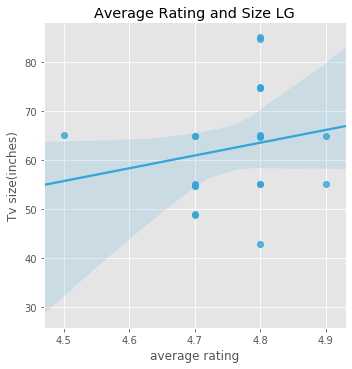

In [76]:
sns.lmplot('avgrating', 'size', data=rsony, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('average rating', fontsize=12)
plt.ylabel('Tv size(inches)', fontsize=12)
#print(stats.pearsonr(rsamsung.avgrating, rsamsung.size))
plt.title('Average Rating and Size LG')


(nan, 1.0)


Text(0.5, 1, 'Price and TV Size')

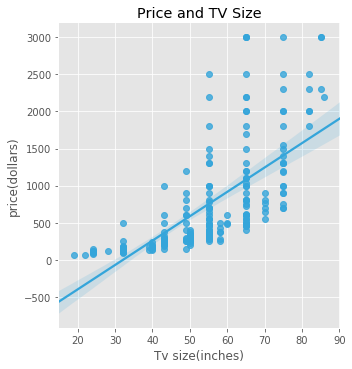

In [77]:
sns.lmplot('size', 'price', data=r, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('Tv size(inches)', fontsize=12)
plt.ylabel('price(dollars)', fontsize=12)
print(stats.pearsonr(rsamsung.avgrating, rsamsung.size))
plt.title('Price and TV Size')

(nan, 1.0)


Text(0.5, 1, 'Price and TV Rating of all TVs')

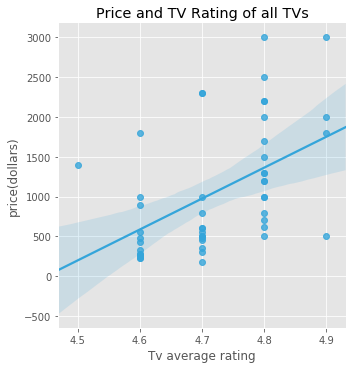

In [78]:
sns.lmplot('avgrating', 'price', data=rsamsung, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('Tv average rating', fontsize=12)
plt.ylabel('price(dollars)', fontsize=12)
print(stats.pearsonr(rsamsung.avgrating, rsamsung.size))
plt.title('Price and TV Rating of all TVs')

In [79]:
r.dtypes

avgrating    float64
brand         object
price        float64
size           int32
dtype: object

In [80]:
rsamsung.groupby(['avgrating','price','size']).max()


brand
avgrating price   size         
4.5       1399.99 55    Samsung
4.6       229.99  43    Samsung
          249.99  32    Samsung
          279.99  43    Samsung
                  50    Samsung
          329.99  55    Samsung
          429.99  58    Samsung
          479.99  65    Samsung
          549.99  70    Samsung
          899.99  75    Samsung
          999.99  75    Samsung
          1799.99 65    Samsung
4.7       179.99  32    Samsung
          299.99  43    Samsung
          349.99  50    Samsung
          449.99  55    Samsung
          479.99  55    Samsung
          499.99  43    Samsung
                  58    Samsung
          549.99  55    Samsung
          599.99  49    Samsung
                  65    Samsung
          799.99  49    Samsung
          999.99  65    Samsung
          2299.99 75    Samsung
                  82    Samsung
4.8       499.99  49    Samsung
          619.99  65    Samsung
          699.99  55    Samsung
          799.99  65    Samsung
          999.99  43    Samsung
                  55    Samsung
          1199.99 49    Samsung
                  65    Samsung
          1299.99 55    Samsung
                  75    Samsung
          1499.99 75    Samsung
          1699.99 65    Samsung
          1999.99 82    Samsung
          2199.99 55    Samsung
                  65    Samsung
          2499.99 82    Samsung
          2999.99 85    Samsung
4.9       499.99  32    Samsung
          1799.99 82    Samsung
          1999.99 75    Samsung
          2999.99 65    Samsung

Text(0.5, 1.0, 'Average Screen size')

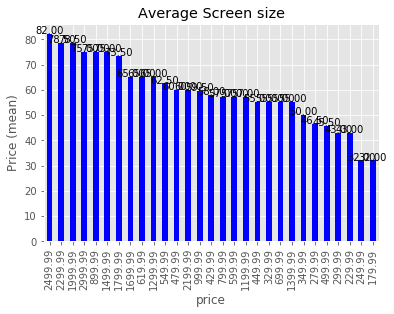

In [81]:
plot = rsamsung.groupby('price')['size'].mean().sort_values(ascending=False).plot.bar(color='b')
plot.set_ylabel("Price (mean)", fontsize=12)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x()+p.get_width()/2.,
            height+.1,
            '{:1.2f}'.format(height),
            ha="center") 
plt.title('Average Screen size')

(nan, 1.0)


Text(0.5, 1, 'Average rating and price of samsung')

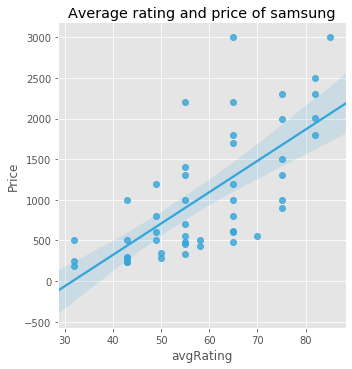

In [82]:
sns.lmplot('size', 'price', data=rsamsung, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('avgRating', fontsize=12)
plt.ylabel('Price', fontsize=12)
print(stats.pearsonr(rsamsung.avgrating, rsamsung.size))
plt.title('Average rating and price of samsung')

Text(0.5, 1.0, 'Average Screen size')

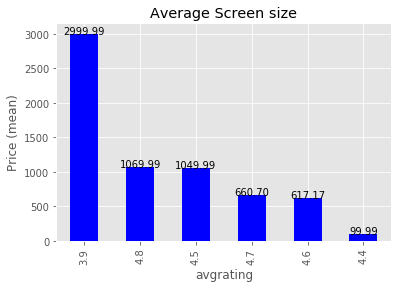

In [83]:
plot = rLG.groupby('avgrating')['price'].mean().sort_values(ascending=False).plot.bar(color='b')
plot.set_ylabel("Price (mean)", fontsize=12)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x()+p.get_width()/2.,
            height+.1,
            '{:1.2f}'.format(height),
            ha="center") 
plt.title('Average Screen size')

(nan, 1.0)


Text(0.5, 1, 'Average rating and price of lg')

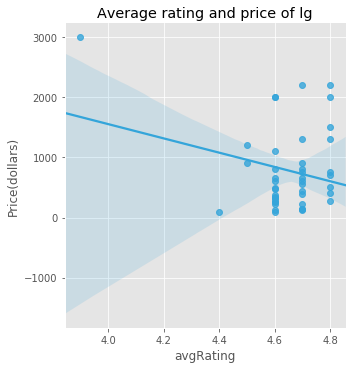

In [84]:
sns.lmplot('avgrating', 'price', data=rLG, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('avgRating', fontsize=12)
plt.ylabel('Price(dollars)', fontsize=12)
print(stats.pearsonr(rsamsung.avgrating, rsamsung.size))
plt.title('Average rating and price of lg')

Text(0.5, 1.0, 'price to screen size')

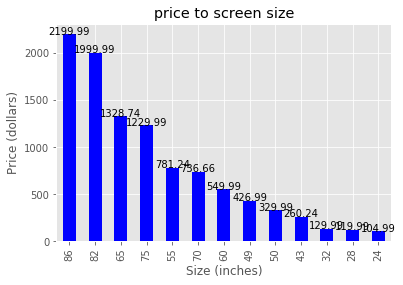

In [85]:
plot = rLG.groupby('size')['price'].mean().sort_values(ascending=False).plot.bar(color='b')
plot.set_ylabel("Price (dollars)", fontsize=12)
plot.set_xlabel("Size (inches)", fontsize=12)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x()+p.get_width()/2.,
            height+.1,
            '{:1.2f}'.format(height),
            ha="center") 
plt.title('price to screen size')

(0.49350387007788726, 0.0003649367833256252)


Text(0.5, 1, 'Average Rating and Size')

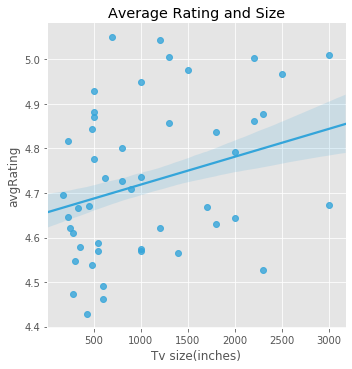

In [86]:
sns.lmplot('price', 'avgrating', data=rsamsung, y_jitter=0.25, line_kws={'color':'#34A5DA'}, scatter_kws={'color':'#34A5DA'})
plt.xlabel('Tv size(inches)', fontsize=12)
plt.ylabel('avgRating', fontsize=12)
print(stats.pearsonr(rsamsung.avgrating, rsamsung.price))
plt.title('Average Rating and Size')